In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_pickle("../Data/filteredDataAQ.pkl")
df.head()

,PM25,PM10,CO,NO2,O3,NH3,SO2,TEMPRATURE,Year,Month,Day,Hour,Weekday,AQI
dt,,,,,,,,,,,,,,
2020-12-14 00:00:00,34.58,197.2,1.17,12.97,0.51,21.88,2.57,11.75,2020,12,14,0,0,164
2020-12-14 00:15:00,35.78,195.16,1.32,13.73,0.54,22.08,2.97,12.04,2020,12,14,0,0,163
2020-12-14 00:30:00,48.05,174.22,1.33,12.21,0.96,21.45,3.09,11.93,2020,12,14,0,0,149
2020-12-14 00:45:00,48.05,174.22,1.34,11.97,1.02,21.77,3.21,11.73,2020,12,14,0,0,149
2020-12-14 01:00:00,48.05,174.22,1.37,11.87,0.69,21.41,3.63,11.78,2020,12,14,1,0,149


In [3]:
df.values

array([[34.58, 197.2, 1.17, ..., 0, 0, 164],
       [35.78, 195.16, 1.32, ..., 0, 0, 163],
       [48.05, 174.22, 1.33, ..., 0, 0, 149],
       ...,
       [85.27, 221.59, 0.24, ..., 16, 5, 184],
       [81.43, 209.18, 0.31, ..., 16, 5, 172],
       [75.41, 190.56, 0.31, ..., 16, 5, 160]], dtype=object)

In [22]:
X=df.drop("AQI",axis=1)
Y=df["AQI"]
n=df.shape[0]
n=int (n*0.65)
train_x=X[:n-1]
test_x=X[n-1:-1]
train_y=Y[1:n]
test_y=Y[n:]

#train_x=train_x.astype(int)
#test_x=test_x.astype(int)
train_y=train_y.astype(int)
test_y=test_y.astype(int)

### Logistic Regression

In [23]:
model=LogisticRegression()
model.fit(train_x,train_y)
p=model.predict(test_x)
acc_log= round(model.score(train_x,train_y) * 100, 2)
acc_logP= round(model.score(test_x,test_y) * 100, 2)
p

C:\Users\Sahil Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([326, 355, 349, ..., 176, 176, 176])

### KNN

In [24]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(train_x,train_y)  
Y_pred = knn.predict(test_x)  
acc_knn = round(knn.score(train_x,train_y) * 100, 2)  
acc_knnP = round(knn.score(test_x,test_y) * 100, 2)
Y_pred

array([336, 323, 428, ..., 172, 172, 161])

### Random Forest

In [25]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_x,train_y)

Y_prediction = random_forest.predict(test_x)

acc_random_forest = round(random_forest.score(train_x,train_y) * 100, 2)
acc_random_forestP = round(random_forest.score(test_x,test_y) * 100, 2)
Y_prediction

array([336, 336, 428, ..., 220, 220, 220])

### Decision Tree

In [26]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(train_x,train_y)  
Y_pred2 = decision_tree.predict(test_x)  
acc_decision_tree = round(decision_tree.score(train_x,train_y) * 100, 2)  
acc_decision_treeP = round(decision_tree.score(test_x,test_y) * 100, 2)
Y_pred2

array([336, 337, 358, ..., 210, 210, 210])

### 'Support Vector Machines

In [27]:
linear_svc = LinearSVC()
linear_svc.fit(train_x,train_y)

Y_pred3 = linear_svc.predict(test_x)

acc_linear_svc = round(linear_svc.score(train_x,train_y) * 100, 2)
acc_linear_svcP = round(linear_svc.score(test_x,test_y) * 100, 2)
Y_pred3

C:\Users\Sahil Kumar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([187, 187, 499, ..., 187, 187, 187])

### RESULT

In [28]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree'],
    'Train_Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest,acc_decision_tree],
    'Test_Score': [acc_linear_svcP, acc_knnP, acc_logP, 
              acc_random_forestP,acc_decision_treeP]})
result_df = results.sort_values(by='Test_Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Train_Score,Test_Score
Model,,
Decision Tree,99.09,3.23
Random Forest,99.09,2.57
KNN,64.12,1.91
Logistic Regression,9.97,1.10
Support Vector Machines,1.03,0.44


### Evaluation

In [29]:
from sklearn.metrics import plot_confusion_matrix

In [30]:
# Support Vector Machines

#plot_confusion_matrix(linear_svc,test_x,test_y)
print('SVM Confucion Matrix')

SVM Confucion Matrix


In [31]:
# KNN

#plot_confusion_matrix(knn,test_x,test_y)
print('LG Confusion Matrix')

LG Confusion Matrix


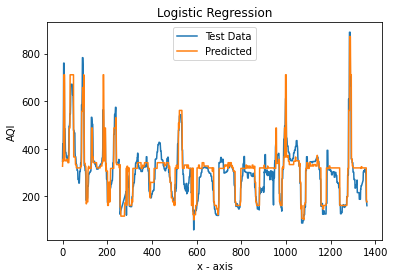

In [32]:
# Logistic Regression  
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), p,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('Logistic Regression')
plt.legend()
plt.show() 

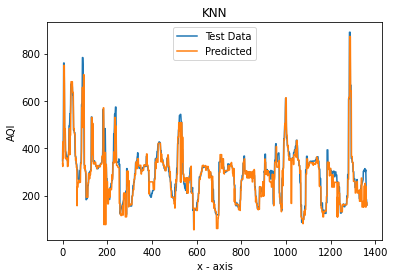

In [33]:
# KNN  
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_pred,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('KNN')
plt.legend()
plt.show() 

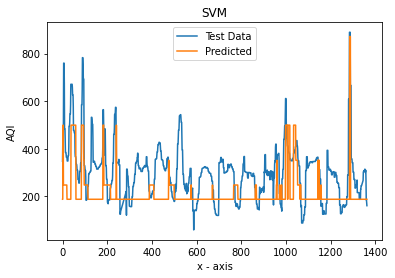

In [34]:
# SVM  
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_pred3,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('SVM')
plt.legend()
plt.show() 

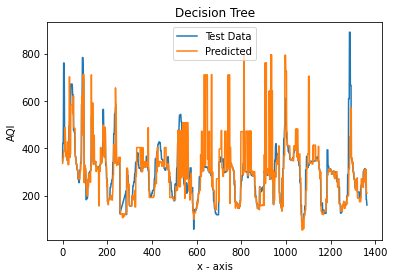

In [35]:
# Dession Tree  
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_pred2,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('Decision Tree')
plt.legend()
plt.show() 

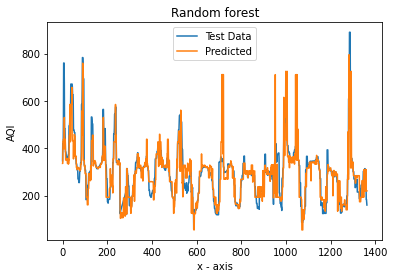

In [36]:
# Random Forest 
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_prediction,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('Random forest')
plt.legend()
plt.show() 

In [37]:
# Serialize mlp_nn object into a file called mlp_nn.pkg on disk using pickle
import pickle
with open('decisionTree.pkl', 'wb') as handle:
    pickle.dump(decision_tree, handle, pickle.HIGHEST_PROTOCOL)
    

In [38]:
# de-serialize mlp_nn.pkl file into an object called mlp_nn using pickle
with open('decisionTree.pkl', 'rb') as handle:
    aqiModel = pickle.load(handle) 

In [39]:
test_x

,PM25,PM10,CO,NO2,O3,NH3,SO2,TEMPRATURE,Year,Month,Day,Hour,Weekday
dt,,,,,,,,,,,,,
2021-02-13 11:45:00,167.43,349.2,1.74,12.26,30.89,20.99,10.06,20.86,2021,2,13,11,5
2021-02-13 12:00:00,181.13,379.52,2.07,12.5,28.56,22.3,8.34,21.51,2021,2,13,12,5
2021-02-13 12:15:00,211.45,446.66,2.32,12.3,34.04,22.18,10.94,22.09,2021,2,13,12,5
2021-02-13 12:30:00,211.45,446.66,2.11,13.07,41.17,23.03,11.71,22.11,2021,2,13,12,5
2021-02-13 12:45:00,211.45,446.66,2.08,11.91,47.63,21.7,13.14,22.7,2021,2,13,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-27 15:15:00,132.87,200.64,0.27,9.77,36.9,23.37,7.28,31.91,2021,2,27,15,5
2021-02-27 15:30:00,109.12,204.84,0.28,9.21,37.69,23.28,7.16,31.73,2021,2,27,15,5
2021-02-27 15:45:00,85.27,221.59,0.27,9.74,37.05,23.63,6.01,31.79,2021,2,27,15,5
